C:\Users\Ada\AppData\Local\Temp\ipykernel_24504\2218118468.py:63: RankWarning: Polyfit may be poorly conditioned
  center = find_blurry_line_center(image_path)


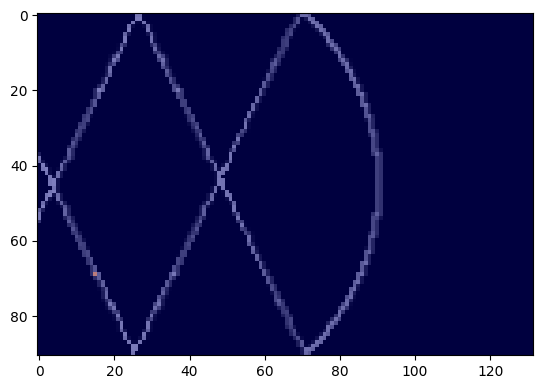

Estimated Center: (15.0, 69.0)


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_blurry_line_center(img_path, min_area=100, degree=2):
    """
    Find the center of blurry lines in an image.

    Parameters:
    - img_path: Path to the image file.
    - min_area: Minimum contour area to consider. Default is 100.
    - degree: Degree of the polynomial for curve fitting. Default is 2.

    Returns:
    - Tuple (center_x, center_y): Estimated center coordinates of the blurry lines.
    """

    # Load the image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian blur to reduce noise
    #blurred = cv2.GaussianBlur(img, (5, 5), 0)

    # Apply adaptive thresholding to create a binary image
    _, binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

    # Optionally, perform morphological operations to further enhance the image
    #kernel = np.ones((3, 3), np.uint8)
    #morphed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours based on area
    #contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]
    # Create a blank canvas to draw the lines
    line_canvas = np.zeros_like(img)
    
    # Fit a curve to the remaining contours
    if contours:
        cnt = max(contours, key=cv2.contourArea)  # Choose the largest contour
        curve = np.polyfit(cnt[:, 0, 0], cnt[:, 0, 1], degree)

        # Get the center of the curve
        center_x = np.mean(cnt[:, 0, 0])
        center_y = np.polyval(curve, center_x)
        
        # Draw a line along the center
        cv2.line(line_canvas, (int(center_x), int(center_y)), (int(center_x), int(center_y)), 255, 1)

        # Plot the original image with the lines
        plt.imshow(img, cmap='gray')
        plt.imshow(line_canvas, cmap='jet', alpha=0.5)
        plt.show()


        return center_x, center_y
    else:
        return None

# Example usage:
image_path = r'A:\Users\Ada\GitHub\DeepClean_Repo\Parabola2 - Epoch 226.png'  # Replace with the actual path to your image
center = find_blurry_line_center(image_path)
print("Estimated Center:", center)
